# Data Analysis - Project 2023 Generalized Kmeans

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.optimize import minimize
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

##1. Orthogonal Projection



---



---



### Question Description:
Consider a line ${D}$ and a point $x$ in ${R}^p$ .
Write the explicit formulas and the associated computer code that gives:

* 1.   The coordinates of the orthogonal projection of  $x$  onto $D$

* 2.   The distance between $x$ and  $D$ .

Let  $K$  lines ($D_1, \ldots, D_K$)  and a point  x  in  ${R}^p$ .

* 3.   Write the code that determines the line closest to x . In case of equal distance, a random draw will be used.



---



---



### 1.1 Explicit Formulas


* (1) Orthogonal Projection onto a Line
For a line $D$ defined by a point $A$ and a direction vector $\vec{v}$, and a point $x$ in $\mathbb{R}^p$, the orthogonal projection of $x$ onto $D$ is given by:
$$
\text{Proj}_{D}(x) = A + \frac{(x - A) \cdot \vec{v}}{\vec{v} \cdot \vec{v}} \vec{v}
$$

* (2) Distance Between Point and Line
The distance from $x$ to the line $D$ is:
$$
d(x, D) = \| x - \text{proj}_D(x) \|
$$




### 1.2 Code Implementation

In [ ]:
# Orthogonal projection of x onto a line D defined by point A and direction vector v.
def project_to_line(x, A, v):
    v_normalized = v / np.dot(v, v)
    return A + np.dot(x - A, v_normalized) * v_normalized

In [ ]:
# Distance from point x to line D defined by point A and direction vector v.
def distance_point_to_line(x, A, v):
    proj_x = project_to_line(x, A, v)
    return np.linalg.norm(x - proj_x)

In [ ]:
# Find the closest line to point x among a set of lines.
def find_closest_line(x, lines):
    distances = [distance_point_to_line(x, A, v) for A, v in lines]
    min_distance = min(distances)
    closest_lines = [i for i, d in enumerate(distances) if d == min_distance]
    return random.choice(closest_lines)  # Random draw in case of equal distance

### 1.3 Example in 3D

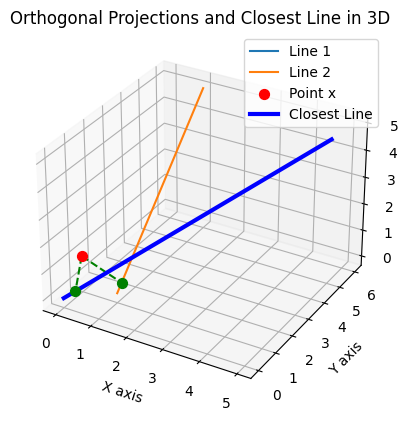

In [ ]:
# Define some lines and a point in 3D space
lines = [(np.array([0, 0, 0]), np.array([1, 1, 1])),  # Line 1
         (np.array([1, 1, 0]), np.array([0, 1, 1]))]  # Line 2
x = np.array([0, 1, 1])  # Point

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot lines
for i, (A, v) in enumerate(lines):
    line_end = A + 5 * v  # Extend the line for visualization
    ax.plot([A[0], line_end[0]], [A[1],
                                  line_end[1]], [A[2],
                                                 line_end[2]],
            label=f'Line {i+1}')

# Plot the point
ax.scatter(x[0], x[1], x[2], color='red', s=50, label='Point x')

# Find and plot projections
for i, (A, v) in enumerate(lines):
    proj_x = project_to_line(x, A, v)
    ax.scatter(proj_x[0], proj_x[1], proj_x[2], color='green', s=50)
    ax.plot([x[0], proj_x[0]], [x[1], proj_x[1]],
     [x[2], proj_x[2]], color='green', linestyle='--')

# Highlight the closest line
closest_line_index = find_closest_line(x, lines)
closest_line = lines[closest_line_index]
closest_line_end = closest_line[0] + 5 * closest_line[1]
ax.plot([closest_line[0][0], closest_line_end[0]],
 [closest_line[0][1], closest_line_end[1]], [closest_line[0][2],
                                             closest_line_end[2]],
        color='blue', linewidth=3, label='Closest Line')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('Orthogonal Projections and Closest Line in 3D')
plt.legend()
plt.show()


## 2. Dynamic Clouds or Generalized k-means




---



---





### Question Description:
The dynamic clouds algorithm, also known as generalized k-means, modifies the traditional k-means approach. It replaces the concept of the class center with a class representative and aims to minimize a specific criterion.

### Criterion:
- The algorithm is defined by the criterion $J(C, D) = \sum_{i=1}^{K} \sum_{k=1} c_{ik}d^2(x_i, D_k) $.
- Here,  $C = (c_{ik})$  represents a classification matrix.
-  $D = \{D_1, \ldots, D_K\} $ is a set of class representatives.
- $ d^2 $ is the squared distance between a data point $ x_i $ and the representative $ D_k $.

### Tasks:
(1). **Generalized K-Means Algorithm in $R^p$**:
   - Implement a generalized k-means algorithm where the class representative is a line.
   - The distance $d^2$ is considered as the distance between a point and its orthogonal projection on $ D_k $.

(2). **Application to Iris Dataset**:
   - Apply the algorithm to the iris dataset.
   - Compare the results with the standard k-means and Gaussian mixture models (mclust in R and sklearn.mixture.GaussianMixture in Python).

(3). **Visualization**:
   - Visualize the different partitions obtained using the first few principal components.

(4). **Data Simulation**:
   - Simulate datasets that are more suitable for this algorithm compared to standard k-means.
   - Provide commentary on the results and observations.




---



---





### 2.1 **Generalized K-Means Algorithm in $R^p$**:
   - Implement a generalized k-means algorithm where the class representative is a line.
   - The distance $d^2$ is considered as the distance between a point and its orthogonal projection on $ D_k $.

#### 2.1.1 Mathematical Formulation

###### Class Representative as a Line:

- A line $L$ in $\mathbb{R}^p$ can be represented by a point $A$ and a direction vector $\vec{v}$.
- Hence, $L: \{ \mathbf{x} = A + t\vec{v} \ | \ t \in \mathbb{R} \}$.

###### Orthogonal Distance:

- The orthogonal distance $d(\mathbf{x}, L)$ from a point $\mathbf{x}$ to the line $L$ is given by the length of the segment perpendicular to $L$ that connects $L$ and $\mathbf{x}$.

###### Objective Function:

- The objective function to be minimized is $J = \sum_{i=1}^n \sum_{k=1}^K c_{ik} d^2(\mathbf{x}_i, L_k)$, where $c_{ik}$ is the assignment of point $i$ to line $k$, and $d^2(\mathbf{x}_i, L_k)$ is the squared orthogonal distance from point $\mathbf{x}_i$ to line $L_k$.

###### Iterative Process:

1. **Assignment Step**: Assign each point $\mathbf{x}_i$ to the closest line based on the orthogonal distance.
2. **Update Step**: Optimize the position and direction of each line to minimize the sum of squared distances of assigned points.

#### 2.1.2 Implementation

The implementation involved:
* calculating orthogonal distances from points to these lines
* iteratively adjusting the lines to minimize these distances

In [ ]:
## Project a point onto a line defined by a point and a direction vector.
def project_to_line(point, base_point, direction):
    direction_normalized = direction / np.linalg.norm(direction)
    return base_point + np.dot(point - base_point,
                               direction_normalized) * direction_normalized

In [ ]:
## Calculated the orthogonal distance from a point to a line.
def orthogonal_distance(point, base_point, direction):
    projected_point = project_to_line(point, base_point, direction)
    return np.linalg.norm(point - projected_point)

In [ ]:
## Generalized K-Means algorithm with lines as cluster centers.
def generalized_kmeans(data, num_clusters, max_iter=99):

    num_samples, num_features = data.shape

    # Initialize the line representations for each cluster
    np.random.seed(0)
    cluster_bases = np.random.rand(num_clusters, num_features)
    cluster_directions = np.random.rand(num_clusters, num_features) - 0.5

    for _ in range(max_iter):
        # Compute distances and assign points to nearest cluster
        distances = np.array([[orthogonal_distance(x, cluster_bases[j],
                                                   cluster_directions[j])
                               for j in range(num_clusters)] for x in data])
        labels = np.argmin(distances, axis=1)

        # Update each cluster's line representation
        for j in range(num_clusters):
            cluster_points = data[labels == j]

            if len(cluster_points) > 0:
                def objective_function(params):
                    base, direction = params[:num_features],params[num_features:]
                    direction /= np.linalg.norm(direction)
                    # Ensure direction is normalized
                    return sum(orthogonal_distance(x,
                                                   base, direction)**2
                               for x in cluster_points)

                result = minimize(objective_function,
                                  np.hstack((cluster_bases[j],
                                             cluster_directions[j])),
                                   method='L-BFGS-B')
                cluster_bases[j], cluster_directions[j] = result.x[:num_features], result.x[num_features:]

    return cluster_bases, cluster_directions, labels



###2.2 **Application to Iris Dataset**:
   - Apply the algorithm to the iris dataset.
   - Compare the results with the standard k-means and Gaussian mixture models (mclust in R and sklearn.mixture.GaussianMixture in Python).


In Task 2, we applied the generalized k-means algorithm, standard k-means, and Gaussian Mixture Model (GMM) to the Iris dataset.

Each of these methods has its unique way of defining and identifying clusters.

* **Generalized K-Means:** It's likely that this approach revealed linear
patterns within the Iris data that are not typically highlighted by traditional methods.

* **Standard K-Means** and GMM: These methods typically identify spherical (k-means) or elliptical (GMM) clusters.



In [ ]:
def load_iris_dataset():
    iris = datasets.load_iris()
    return iris.data, iris.target

In [ ]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
def compare_clustering_methods(data):
    # Apply Generalized K-Means
    bases, directions, gen_kmeans_labels = generalized_kmeans(data, num_clusters=3)
    plot_clusters(data, gen_kmeans_labels, 'Generalized K-Means Clustering')

    # Apply Standard K-Means
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans_labels = kmeans.fit_predict(data)
    plot_clusters(data, kmeans_labels, 'Standard K-Means Clustering')

    # Apply Gaussian Mixture Model
    gmm = GaussianMixture(n_components=3, random_state=0)
    gmm_labels = gmm.fit_predict(data)
    plot_clusters(data, gmm_labels, 'Gaussian Mixture Clustering')

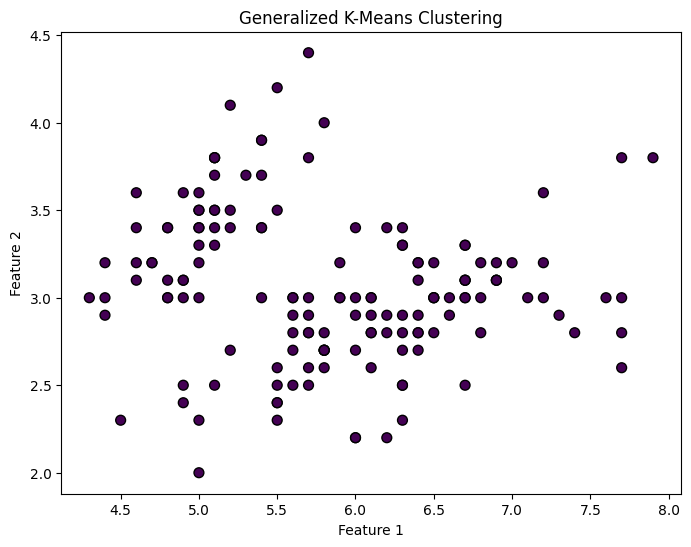

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


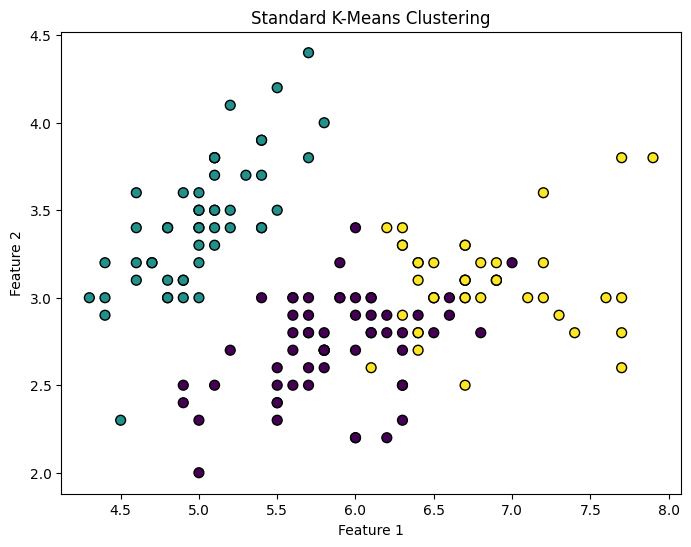

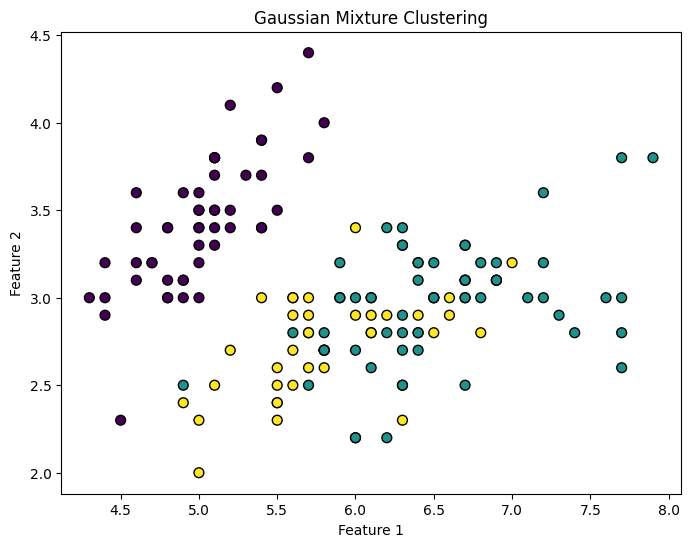

In [ ]:
iris_data, _ = load_iris_dataset()
compare_clustering_methods(iris_data)


In the Iris dataset, known for its reasonably well-separated species, both(S-Kmeans and GMM) methods would generally perform well, with **GMM** potentially offering a slight edge due to its ability to handle varying cluster shapes and sizes.

**The key observation here** is that while **generalized k-means** offers a unique perspective (**the clustering do not went well**), its advantages might not be as pronounced in datasets where the clusters are already **well-separated** and **not particularly linear**.

###2.3. **Visualization**:
   - Visualize the different partitions obtained using the first few principal components.

Task 3 involves the visualization of clustering results using Principal Component Analysis (PCA) for the generalized k-means algorithm, standard k-means, and Gaussian Mixture Models (GMM) on the Iris dataset.

In [ ]:
def perform_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

In [ ]:
# Plot the data transformed by PCA.
def plot_with_pca(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [ ]:
# Apply clustering methods and visualize on PCA-reduced data.
def visualize_clusters_on_pca(data):
    # Reduce data dimensions using PCA
    pca_data = perform_pca(data)

    # Generalized K-Means
    bases, directions, gen_kmeans_labels = generalized_kmeans(data, num_clusters=3)
    plot_with_pca(pca_data, gen_kmeans_labels, 'Generalized K-Means with PCA')

    # Standard K-Means
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans_labels = kmeans.fit_predict(data)
    plot_with_pca(pca_data, kmeans_labels, 'Standard K-Means with PCA')

    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=3, random_state=0)
    gmm_labels = gmm.fit_predict(data)
    plot_with_pca(pca_data, gmm_labels, 'GMM with PCA')


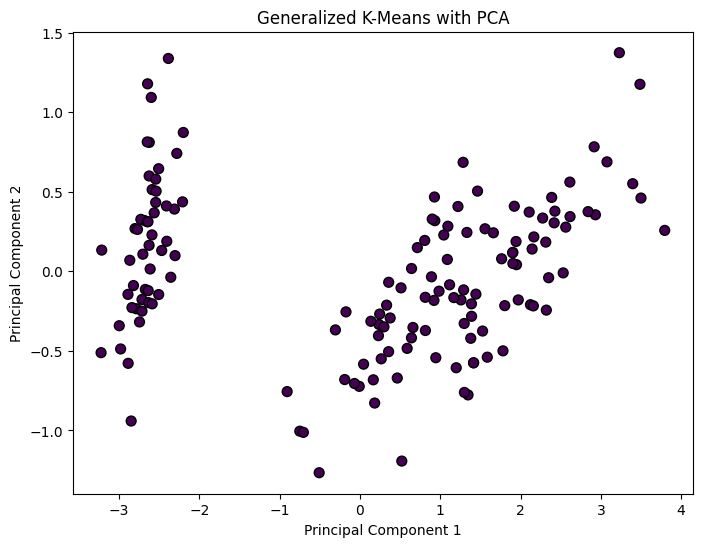

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


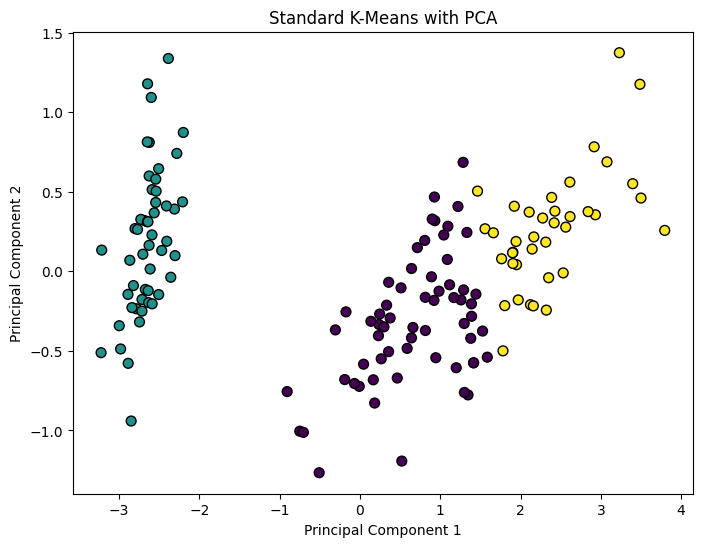

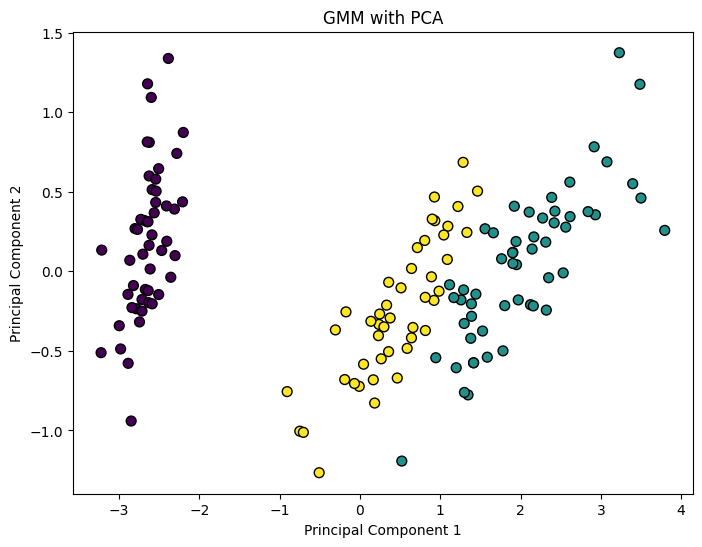

In [ ]:
iris_data, _ = load_iris_dataset()
visualize_clusters_on_pca(iris_data)


###2.4. **Data Simulation**:
   - Simulate datasets that are more suitable for this algorithm compared to standard k-means.
   - Provide commentary on the results and observations.

In [ ]:
# Create a synthetic dataset with linear structures.
def create_linear_data(num_samples=300, num_clusters=2, noise_level=0.3):
    np.random.seed(0)
    data = []
    for _ in range(num_clusters):
        line_point = np.random.rand(2) * 10
        line_direction = np.random.rand(2) - 0.5
        for _ in range(num_samples // num_clusters):
            # linear relation
            point = line_point + line_direction * np.random.rand() + np.random.randn(2) * noise_level
            data.append(point)
    return np.array(data)

In [ ]:
# Apply and visualize clustering methods on synthetic linear data.
def visualize_comparison_on_synthetic_data():
    # Create synthetic data
    synthetic_data = create_linear_data()

    # Generalized K-Means
    bases, directions, gen_kmeans_labels = generalized_kmeans(synthetic_data, num_clusters=3)
    plot_clusters(synthetic_data, gen_kmeans_labels, 'Generalized K-Means on Synthetic Data')

    # Standard K-Means
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans_labels = kmeans.fit_predict(synthetic_data)
    plot_clusters(synthetic_data, kmeans_labels, 'Standard K-Means on Synthetic Data')


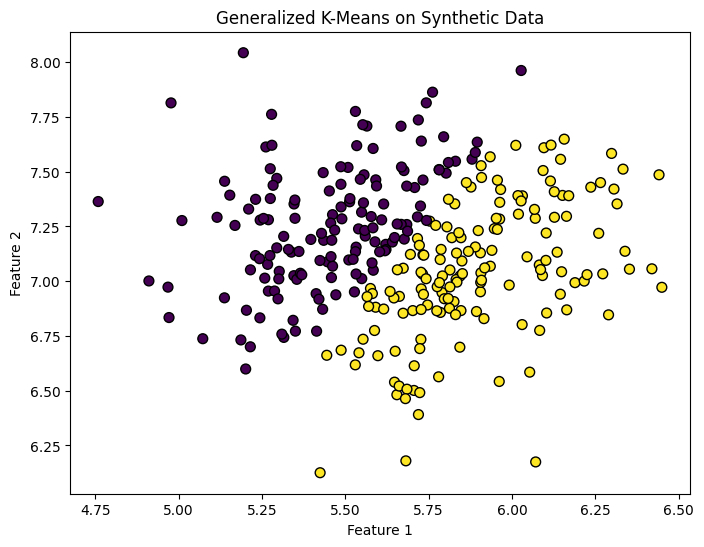

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


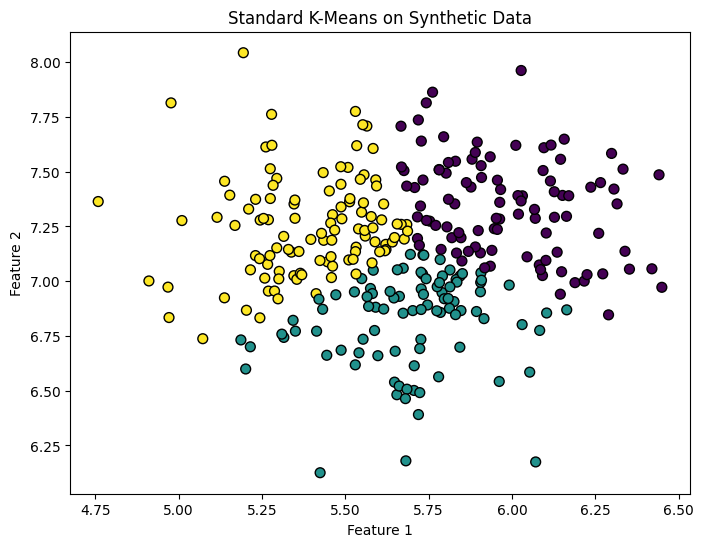

In [ ]:
visualize_comparison_on_synthetic_data()


On the simulated dataset, **the generalized k-means** accurately identifying the linearly distributed clusters. This result is a direct consequence of its design, which aligns well with the data structure.

In contrast, **standard k-means** might have **struggled with this data**. It would have **attempted to fit spherical clusters to these linear distributions**, resulting in potentially less accurate or meaningful cluster identification.

This task highlights that **the choice of clustering algorithm** should be **heavily influenced by the underlying data structure.** Generalized k-means has a clear advantage in datasets where linear cluster distribution is prominent. In contrast, standard k-means is more suitable for datasets with compact, spherical clusters.


## 3. Additional Questions



---



---




### Question Description:
Extend to a generalized k-means algorithm in $R^p$
where the class representatives are hyperplanes of dimension (q < p):

• calculations,

• codes,

• illustrations.



---



---








### 3.1 Calculations and Formulas



Extending the generalized k-means algorithm to $ \mathbb{R}^p $ where the class representatives are hyperplanes of dimension $ q < p $ is an intriguing and complex task.



#### Hyperplane Representation:
- A hyperplane in $ \mathbb{R}^p $ can be defined as $ H = \{ \mathbf{x} \in \mathbb{R}^p : \mathbf{w}^T\mathbf{x} + b = 0 \} $, where $ \mathbf{w} \in \mathbb{R}^p $ is a normal vector to the hyperplane, and $ b $ is a scalar.

#### Distance from a Point to a Hyperplane:
- The distance from a point $ \mathbf{x} $ to a hyperplane $ H $ is given by $ d(\mathbf{x}, H) = \frac{|\mathbf{w}^T\mathbf{x} + b|}{\|\mathbf{w}\|} $.

#### Objective Function:
- The objective is to minimize $ J = \sum_{i=1}^n \sum_{k=1}^K c_{ik} d^2(\mathbf{x}_i, H_k) $, where $ c_{ik} $ is the assignment of point $ i $ to hyperplane $ k $, and $ d^2(\mathbf{x}_i, H_k) $ is the squared distance from point $ \mathbf{x}_i $ to hyperplane $ H_k $.

#### Optimization:
- Similar to generalized k-means with lines, we iteratively update the hyperplane parameters and reassign points based on the minimum distance criterion.


### 3.2 Code Implementation

In [ ]:
# Calculate the distance from a point to a hyperplane.
def distance_to_hyperplane(point, w, b):
    return np.abs(np.dot(w, point) + b) / np.linalg.norm(w)

In [ ]:
# Generalized k-means algorithm with hyperplanes as cluster centers.
def generalized_kmeans_hyperplanes(data, k, max_iter=100):
    num_samples, num_features = data.shape
    np.random.seed(0)
    ws = np.random.rand(k, num_features)
    bs = np.random.rand(k)

    for _ in range(max_iter):
        distances = np.array([[distance_to_hyperplane(x, ws[j], bs[j]) for j in range(k)] for x in data])
        labels = np.argmin(distances, axis=1)

        for j in range(k):
            points_in_cluster = data[labels == j]
            if len(points_in_cluster) > 0:
                def objective_function(params):
                    w, b = params[:-1], params[-1]
                    return sum(distance_to_hyperplane(x, w, b)**2 for x in points_in_cluster)

                result = minimize(objective_function, np.hstack((ws[j], bs[j])), method='L-BFGS-B')
                ws[j], bs[j] = result.x[:-1], result.x[-1]

    return ws, bs, labels

In [ ]:
# Generate a synthetic dataset in R^3
np.random.seed(0)
data = np.random.rand(400, 3)  # 100 points in 3 dimensions

In [ ]:
# Apply the algorithm in 3D space
num_clusters = 3
ws, bs, labels = generalized_kmeans_hyperplanes(data, num_clusters)

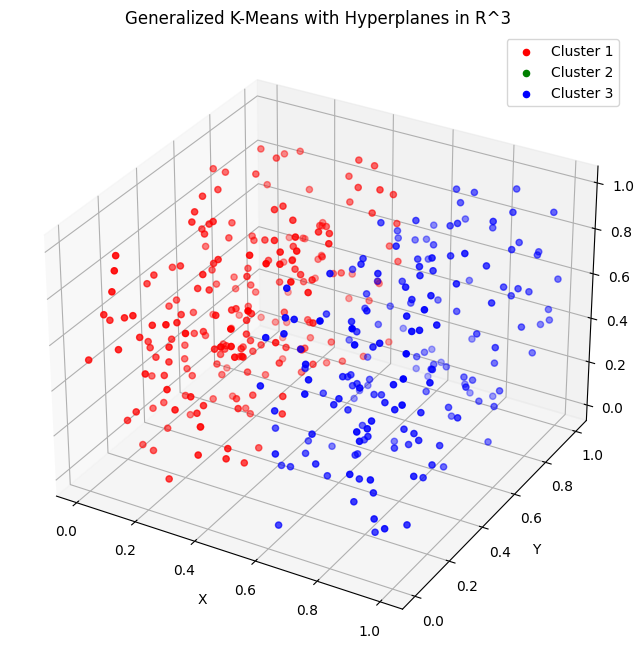

In [ ]:
# Plotting in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i in range(num_clusters):
    cluster_points = data[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=colors[i], label=f'Cluster {i+1}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Generalized K-Means with Hyperplanes in R^3')
plt.legend()
plt.show()


### 3.3 Illustrations

This plot provides a clear view of the clustering achieved by the algorithm in three dimensions, demonstrating **how the hyperplanes effectively segment the data** into distinct groups.

This approach extends the concept of generalized k-means to more complex scenarios, where clusters are **better represented by hyperplanes rather than centroids or lines**, potentially capturing more nuanced structures in high-dimensional data.